#### Fundamentos de Data Science – Práctica para el Examen

* Contexto

* La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

In [2]:
# Codigo para generar los datos

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")


Datos generados y guardados en 'user_app_data.csv'


In [3]:
# Se carga la base de datos

path='user_app_data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [5]:
df.tail()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
295,296,1.3,iOS,33,4,UK,1
296,297,1.1,Android,118,6,Germany,2
297,298,1.2,Android,65,1,Germany,5
298,299,1.0,iOS,146,5,France,5
299,300,1.3,iOS,177,1,Italy,3


#### Requisitos

* 1) Limpieza de Datos:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


#### Se verifica que son 300 entradas y no hay datos nulos, se comprobaran, por si hay algun error
#### se verifica que los tipos de datos corresponden a cada columna los cuales son :   1 float, 4 int y 2 object.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
app_version,300.0,1.155000,0.113363,1.0,1.10,1.2,1.30,1.3
session_duration,300.0,95.840000,51.922773,1.0,51.25,100.5,141.25,179.0
number_of_sessions,300.0,9.596667,5.672853,1.0,5.00,9.0,15.00,19.0
user_feedback,300.0,2.926667,1.449699,1.0,2.00,3.0,4.00,5.0


* Se revisa los datos estadisticos, se encuentra que en la columna session_duration que el maximo valor es 179.0, se supone que la duración de la session es en minutos, por lo tanto se podria suponer que es por dejar abierta la sesion sin usar.
* Se revisa la columna app_version y se puede suponer que el rango de versiones esta entre 1.0 y 1.3.
* Se revisa columna number_of_sessions y se puede suponer que el rango de datos entra entre 1.0 y 19.0.
* Se revisa columna user_feedback y se puede suponer que el rango de datos esta entre 1 y 5.  

* Identificar y abordar cualquier valor duplicado.

In [8]:
# Se revisa si hay datos duplicados
df.duplicated().sum()

np.int64(0)

In [9]:
print(df.shape)

(300, 7)


#### No se encuentran entradas duplicadas

* Identificar y abordar cualquier dato que falte en este conjunto de datos.

In [10]:
# Se revisan columnas por posibles datos faltantes

# Se comprueba columna 'user_id' con el atributo size que devuelve el numero total de filas
df["user_id"].size

300

#### Columna 'user_id' sin faltantes o nulos

In [11]:
# Se comprueba columna 'app_version' con la funcion isna() para encontrar los valores faltantes o nulos

df["app_version"].unique()

array([1.2, 1.3, 1. , 1.1])

In [12]:
# Se verifica que columna app_version contiene valores validos
df["app_version"].value_counts()

,count
app_version,
1.3,81
1.2,77
1.0,74
1.1,68


#### Se verifica que columna contiene rango de versiones de 1.0 a 1.3

In [13]:
# Se comprueba columna 'platform' con la funcion isna() para encontrar los valores faltantes o nulos

df["platform"].unique()

array(['Android', 'iOS'], dtype=object)

#### Se verifica que Columna 'platform' sin faltantes o nulos con dos categorias 'Android' y 'IOS'.

In [14]:
# Se crevisa'session_duration' con la funcion isna() para encontrar los valores faltantes o nulos
df["session_duration"].isna()


,session_duration
0,False
1,False
2,False
3,False
4,False
...,...
295,False
296,False
297,False
298,False


#### Se verifica Columna 'session_duration' sin datos nulos

In [15]:
# Se comprueba columna 'number_of_sessions'  con la funcion isna() para encontrar los valores faltantes o nulos
df["number_of_sessions"].isna()

,number_of_sessions
0,False
1,False
2,False
3,False
4,False
...,...
295,False
296,False
297,False
298,False


#### Se verifica Columna 'number_of_sessions' sin datos nulos

In [16]:
# Se comprueba columna 'country' con la funcion isna() para encontrar los valores faltantes o nulos
df["country"].unique()

array(['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain',
       'Italy'], dtype=object)

Se verifica Columna 'country' sin datos inconsistentes

In [17]:
# Se comprueba columna 'user_feedbac' con la funcion isna() para encontrar los valores faltantes o nulos
df["user_feedback"].unique()

array([1, 2, 5, 4, 3])

#### Se verifica Columna 'user_feedback' sin datos inconsistentes ni nulos

* Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


#### Se verifica que son 300 entradas, no tienen datos nulos las columnas, Se realizara un comprobación, por si hay algun error
#### se verifica los tipos de datos de cada columna que son : 1 float, 4 int y 2 object.

In [19]:
print(df['user_id'].dtype)
print(df['app_version'].dtype)
print(df['platform'].dtype)
print(df['session_duration'].dtype)
print(df['number_of_sessions'].dtype)
print(df['country'].dtype)
print(df['user_feedback'].dtype)

int64
float64
object
int64
int64
object
int64


* Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).

In [20]:
# Se revisa columna 'platform' con metodo unique(), para valores categóricos

df["platform"].unique()

array(['Android', 'iOS'], dtype=object)

Se verifica los valores en columna 'platform' con version 'Android' y 'IOS'

In [21]:
# Se revisa la columna 'country' con metodo unique(), para valores categóricos
df["country"].unique()


array(['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain',
       'Italy'], dtype=object)

#### Se verifica 'columna 'country' sin valores raros.

In [22]:
# Se aplica groupby a columna 'country' con funcion mean() para que devuelva la lista de paises con su promedio de duración de sesion.
df.groupby(["country"])["session_duration"].mean().round(2)

,session_duration
country,
Canada,94.14
France,93.11
Germany,110.38
Italy,88.06
Mexico,92.33
Spain,95.02
UK,94.42
USA,99.49


#### Se comprueba que la columna 'country' no tiene inconsistencias, con 8 paises

* Identificar y abordar cualquier punto de datos inapropiados o inusuales

In [23]:
# Se verifica con método unique(), para la columna 'user_feedback'.
df["user_feedback"].unique()

array([1, 2, 5, 4, 3])

#### Se verifica que el rango de valores de la columna 'user_feedback' es de 1 a 5.

In [24]:
# Se revisa con método unique(), para la columna 'app_version', que los datos sean apropiados segun las versiones.
df["app_version"].unique()

array([1.2, 1.3, 1. , 1.1])

#### Se verifica que los valores son apropiados para 'app_version'.

In [25]:
# Se aplica funcion max() y min() a columna 'session_duration' para comprobar  que no existan datos inusuales
print(df["session_duration"].max())
print(df["session_duration"].min())


179
1


#### Se verifica que el maximo valor es 179 minutos que es esta dentro de lo normal

In [26]:
# Se revisa que la columna 'number_of_sessions' tenga valores dentro de un rango normal
df["number_of_sessions"].unique()


array([11, 17, 13,  1,  2,  9,  3, 16,  6,  5, 10, 19, 14,  4,  8,  7, 18,
       12, 15])

Se verifica que los valores son apropiados, en el rango de 1 a 19

#### 2) Exploración de Datos:

* Dos tipos diferentes de visualizaciones exploratorias univariantes.

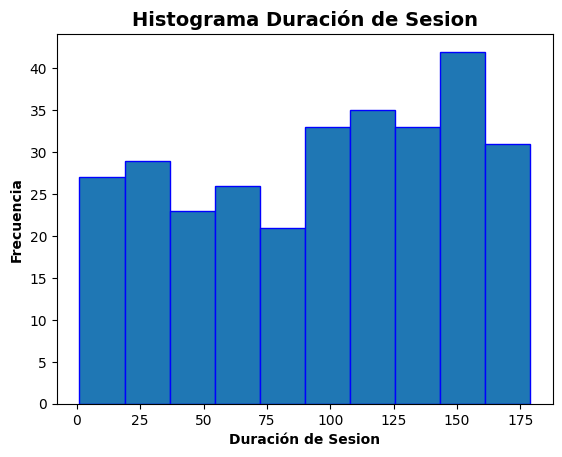

In [27]:
# grafico histograma que muestra la distribución de frecuencia de columna 'session_duration'

plt.hist(df["session_duration"], bins=10, edgecolor='blue')
plt.title('Histograma Duración de Sesion', fontsize=14, fontweight='bold')
plt.xlabel('Duración de Sesion', fontweight='bold')
plt.ylabel('Frecuencia', fontweight='bold')
plt.show()

* Se interpreta que las sesiones disminuyen rápidamente despues de 25 minutos
* Se verifica que hay un grupo de usuarios con duración en la app muy largas,
  con una alta frecuencia.

<ipython-input-35-2124457691>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["user_feedback"], labels=["user_feedback"])


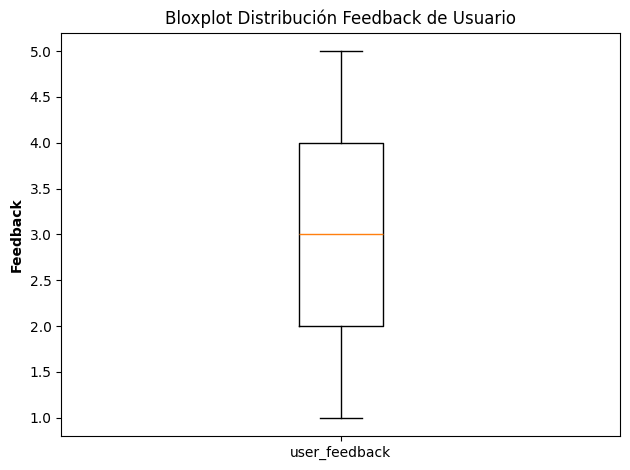

In [35]:
# grafico de caja que muestra la distribucion Feecback del usuario
plt.boxplot(df["user_feedback"], labels=["user_feedback"])
plt.title('Bloxplot Distribución Feedback de Usuario')
plt.ylabel('Feedback', fontweight='bold')
plt.tight_layout()
plt.show()

#### Se interpreta que la mediana en 3.0 sugiere que en general los usuarios tienen una opinion neutral a positiva.
#### Se verifica que no hay datos que se escapan de la mayoria.


* Dos tipos diferentes de visualizaciones exploratorias multivariantes.

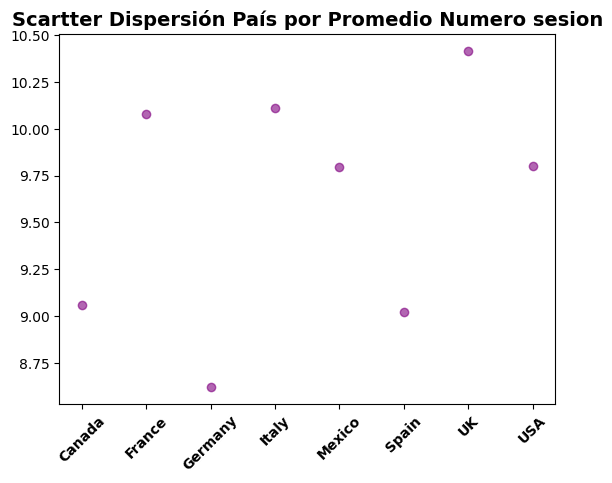

In [44]:
# Se creo un nuevo dataframe con el promedio de 'number_of_sessions' clasificado por 'country' y se resetearon los indices
dc_df = df.groupby(["country"])["number_of_sessions"].mean().reset_index()

#  Se crea gráfico Scatter para comparar Paises con Numero de sesiones

# Dispersión.
plt.scatter(dc_df["country"], dc_df["number_of_sessions"], color='purple', alpha=0.6)
plt.title('Scartter Dispersión País por Promedio Numero sesion', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
# Mostrar.
plt.show()

#### Reino unido lidera con el mayor uso de 10.5
#### Francia e Italia ocupan el segundo lugar de uso de las app
#### Alemania ocupa el ultimo lugar de uso de las app
#### En alemania hay oportunidad de mejorar la experiencia


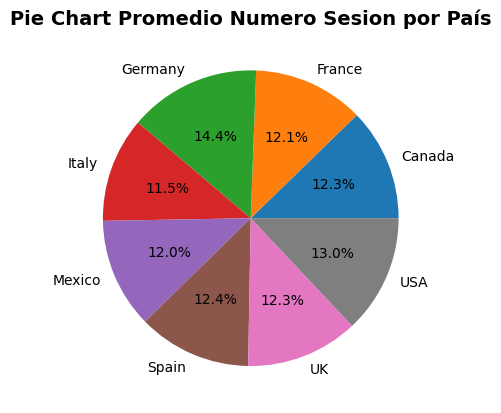

In [51]:
# Se creo un nuevo dataframe con el promedio de 'number_of_sessions' clasificado por 'country' y se resetearon los indices
pf_df = df.groupby(["country"])["session_duration"].mean().reset_index()

# Grafico Pie Chart que muestra correlacion de 'totalcharges' y 'paymentmethod'
plt.pie(pf_df["session_duration"], labels=pf_df["country"], autopct="%.1f%%")
plt.title("Pie Chart Promedio Numero Sesion por País",fontsize=14, fontweight='bold')
plt.show()

#### Alemania y USA tienen mayor participación de sesiones que los otros paises con un promedio un poco menor